###  🎯  Objetivos:
O objetivo geral deste projeto é entender as tendências de crescimento populacional ao redor do mundo. Para isso, serão realizados os seguintes objetivos específicos:

* Analisar as tendências de crescimento populacional em diferentes países e regiões.
* Criar visualizações para ilustrar dados sobre a população mundial.
* Comparar a densidade populacional de diferentes países.  
* Desenvolver um modelos preditivo para o crescimento populacional futuro.

#### 🔁 Conectando o Google Colab ao Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


📚 Importando as bibliotecas necessárias

In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

#### 🎲 Importando os dados

In [ ]:
df = pd.read_csv('world_population_data.csv')

#### 👀 Dando uma olhada na estrutura geral dos dados

In [ ]:
df.head()

,rank,cca3,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
0,1,IND,India,Asia,1428627663,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590.0,481,0.81%,17.85%
1,2,CHN,China,Asia,1425671352,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961.0,151,-0.02%,17.81%
2,3,USA,United States,North America,339996563,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610.0,37,0.50%,4.25%
3,4,IDN,Indonesia,Asia,277534122,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569.0,148,0.74%,3.47%
4,5,PAK,Pakistan,Asia,240485658,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912.0,312,1.98%,3.00%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              234 non-null    int64  
 1   cca3              234 non-null    object 
 2   country           234 non-null    object 
 3   continent         234 non-null    object 
 4   2023 population   234 non-null    int64  
 5   2022 population   234 non-null    int64  
 6   2020 population   234 non-null    int64  
 7   2015 population   234 non-null    int64  
 8   2010 population   234 non-null    int64  
 9   2000 population   234 non-null    int64  
 10  1990 population   234 non-null    int64  
 11  1980 population   234 non-null    int64  
 12  1970 population   234 non-null    int64  
 13  area (km²)        234 non-null    float64
 14  density (km²)     234 non-null    int64  
 15  growth rate       234 non-null    object 
 16  world percentage  234 non-null    object 
dt

Todas as colunas possuem 234 valores não nulos, o que significa que não há dados ausentes neste DataFrame.

In [ ]:
df.describe()

,rank,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²)
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000
mean,117.500000,3.437442e+07,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814500e+05,451.282051
std,67.694165,1.373864e+08,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,1979.398922
min,1.000000,5.180000e+02,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,4.400000e-01,0.000000
25%,59.250000,4.225982e+05,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,39.500000
50%,117.500000,5.643895e+06,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,97.500000
75%,175.750000,2.324537e+07,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,242.750000
max,234.000000,1.428628e+09,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,21403.000000


In [ ]:
print('Tamanho do Dataset:', df.shape)

Tamanho do Dataset: (234, 17)


## 🔎📊 Análise Exploratória:

### Correlações entre Variáveis

<ipython-input-11-cf71ffe0c05c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


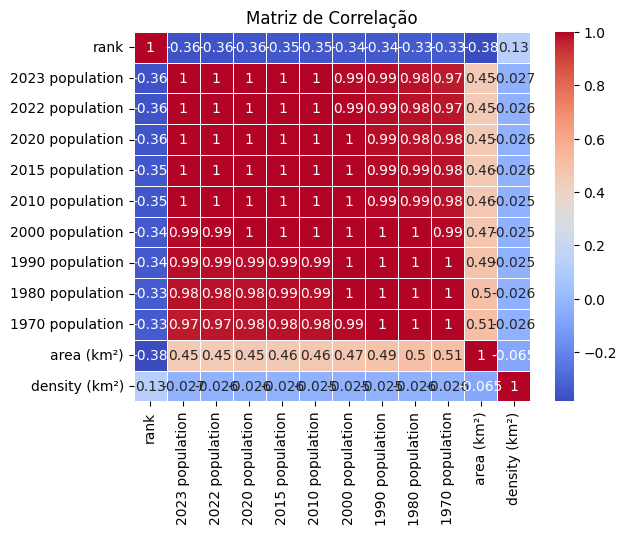

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

### Distribuição da População por Continente

<ipython-input-12-fc88ad28c9ed>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='2023 population', y='continent', data=df, ci=None, estimator=sum, palette='viridis')
<ipython-input-12-fc88ad28c9ed>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='2023 population', y='continent', data=df, ci=None, estimator=sum, palette='viridis')


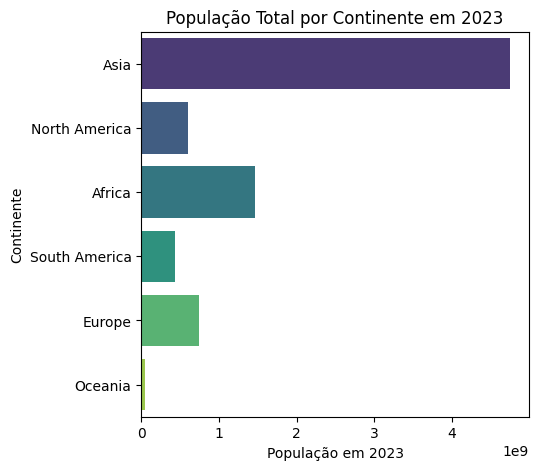

In [ ]:
plt.figure(figsize=(5, 5))
sns.barplot(x='2023 population', y='continent', data=df, ci=None, estimator=sum, palette='viridis')
plt.title('População Total por Continente em 2023')
plt.xlabel('População em 2023')
plt.ylabel('Continente')
plt.show()


### Países mais populosos

<ipython-input-13-357bc18aad6a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='2023 population', y='country', data=top10_countries, palette='viridis')


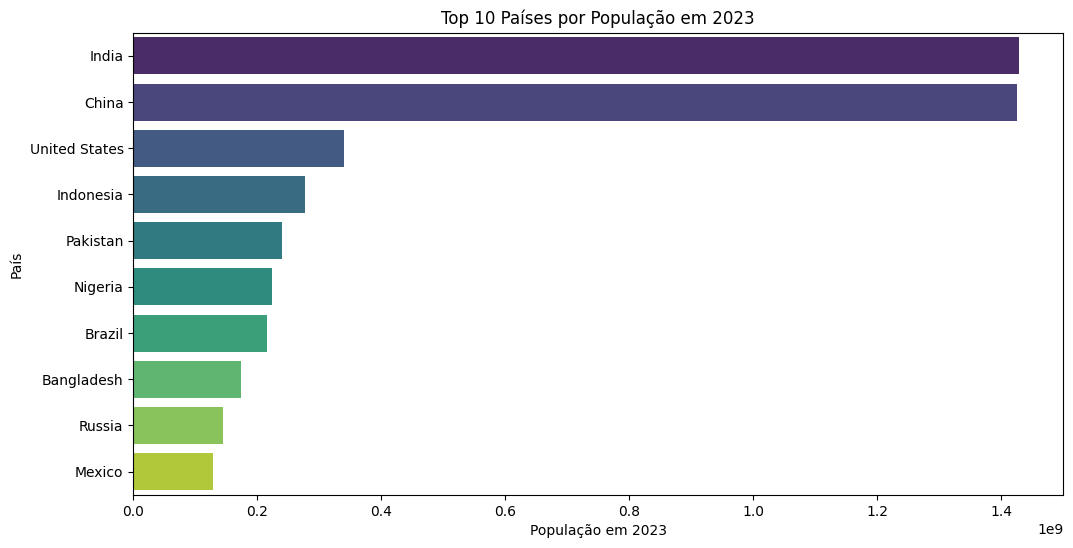

In [ ]:
top10_countries = df.nlargest(10, '2023 population')

plt.figure(figsize=(12, 6))
sns.barplot(x='2023 population', y='country', data=top10_countries, palette='viridis')
plt.title('Top 10 Países por População em 2023')
plt.xlabel('População em 2023')
plt.ylabel('País')
plt.show()

### Densidade vs. Crescimento Populacional

In [ ]:
df['growth rate'] = df['growth rate'].replace('%', '', regex=True).astype(float)
df['growth rate'].dtype

dtype('float64')

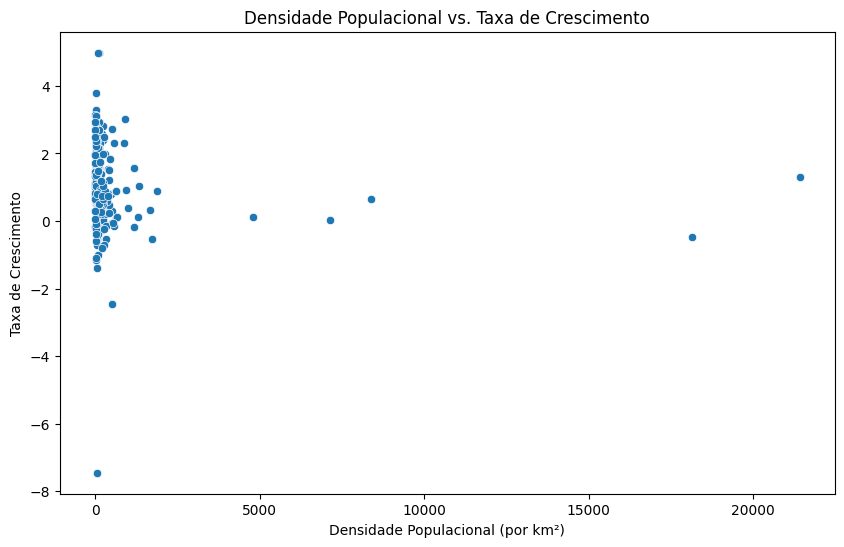

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='density (km²)', y='growth rate', data=df)
plt.title('Densidade Populacional vs. Taxa de Crescimento')
plt.xlabel('Densidade Populacional (por km²)')
plt.ylabel('Taxa de Crescimento')
plt.show()

 ### Distribuição da População por Continente em 2023:

<ipython-input-16-601b9991ad7b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='2023 population', y='continent', data=df, palette='Set2')


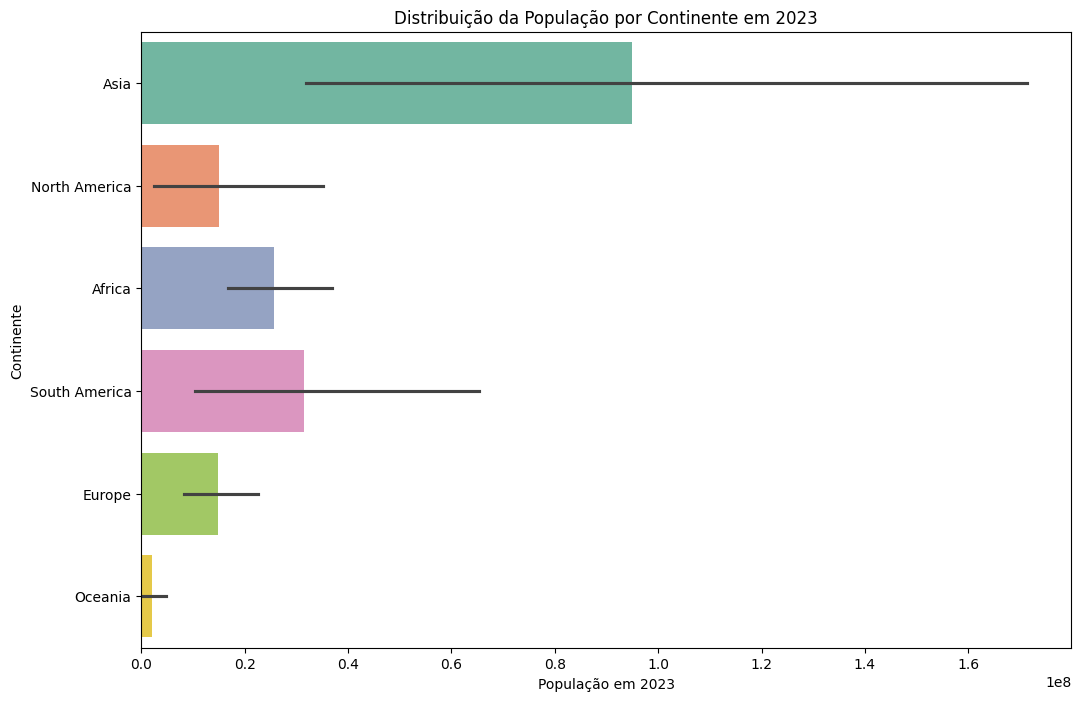

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='2023 population', y='continent', data=df, palette='Set2')
plt.title('Distribuição da População por Continente em 2023')
plt.xlabel('População em 2023')
plt.ylabel('Continente')
plt.show()


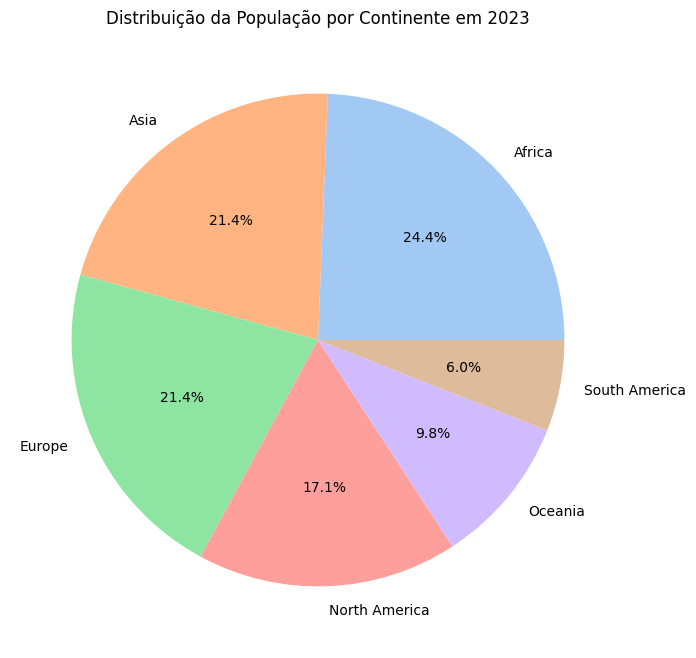

In [ ]:
plt.figure(figsize=(10, 8))
df['continent'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribuição da População por Continente em 2023')
plt.ylabel('')
plt.show()

In [ ]:
df['growth rate'] = pd.to_numeric(df['growth rate'].astype(str).str.rstrip('%'), errors='coerce')
df['world percentage'] = pd.to_numeric(df['world percentage'].astype(str).str.rstrip('%'), errors='coerce')


<ipython-input-19-3f4fa24cf4d0>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='continent', y='2023 population', data=df, estimator=sum, ci=None, palette='viridis')
<ipython-input-19-3f4fa24cf4d0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='continent', y='2023 population', data=df, estimator=sum, ci=None, palette='viridis')


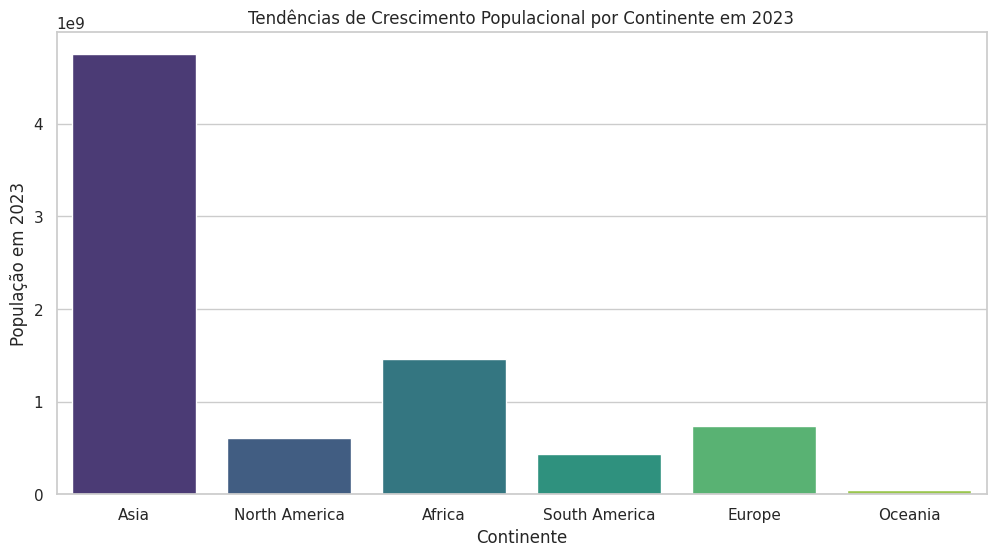

In [ ]:
sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))
sns.barplot(x='continent', y='2023 population', data=df, estimator=sum, ci=None, palette='viridis')

plt.title('Tendências de Crescimento Populacional por Continente em 2023')
plt.xlabel('Continente')
plt.ylabel('População em 2023')
plt.show()

## Desenvolvimento de um Modelo Preditivo para o Crescimento Populacional Futuro: